<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **45 to 60** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data from Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload it on the IBM Watson studio. (If IBM Watson Cloud service does not work in your system, follow the alternate Step 2 below)

Step2(alternate): Upload it in your SN labs environment using the upload button which is highlighted in red in the image below:
Remember to upload this Jobs_API file in the same folder as your current .ipynb file

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Run all the cells of the Jobs_API file. (Even if you receive an asterik sign after running the last cell, the code works fine.)

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [1]:
import requests # you need this module to make an API call
import pandas as pd

In [2]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [3]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [4]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [5]:
print(data)   # print the data just to check the output or for debugging

{'number': 10, 'people': [{'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'Tiangong', 'name': 'Jing Haiping'}, {'craft': 'Tiangong', 'name': 'Gui Haichow'}, {'craft': 'Tiangong', 'name': 'Zhu Yangzhu'}, {'craft': 'ISS', 'name': 'Jasmin Moghbeli'}, {'craft': 'ISS', 'name': 'Andreas Mogensen'}, {'craft': 'ISS', 'name': 'Satoshi Furukawa'}, {'craft': 'ISS', 'name': 'Konstantin Borisov'}], 'message': 'success'}


Print the number of astronauts currently on ISS.


In [6]:
print(data.get('number'))

10


Print the names of the astronauts currently on ISS.


In [9]:
astronauts = data.get('people')
print(f"There are {len(astronauts)} astronauts on ISS")
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 10 astronauts on ISS
And their names are :
Sergey Prokopyev
Dmitry Petelin
Frank Rubio
Jing Haiping
Gui Haichow
Zhu Yangzhu
Jasmin Moghbeli
Andreas Mogensen
Satoshi Furukawa
Konstantin Borisov


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [3]:
#Import required libraries
import pandas as pd
import json
import requests

#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.


In [4]:

# path=os.path.join(os.getcwd(),'example1.txt')
# r=requests.get(url)
# with open(path,'wb') as f:
#     f.write(r.content)
def get_number_of_jobs_T(technology):
    url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()

        # Initialize a counter for the number of occurrences
        number_of_jobs = 0
        # Iterate through the job listings and count occurrences of the specified technology
        for job in job_listings:
            key_skills = job.get("Key Skills", "f{technology}")
            if technology.lower() in key_skills.lower():
                number_of_jobs += 1
        return technology, number_of_jobs
    else:
        print("Failed to fetch data from the URL.")
        return technology, 0 

Calling the function for Python and checking if it works.


In [5]:
get_number_of_jobs_T("Python")

('Python', 1173)

#### Write a function to find number of jobs in US for a location of your choice


In [6]:
def get_number_of_jobs_L(location):
    url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()
        # Initialize a counter for the number of occurrences
        number_of_jobs = 0
        # Iterate through the job listings and count occurrences of the specified technology
        for job in job_listings:
            key_skills = job.get("Location", "f{location}")
            if location.lower() in key_skills.lower():
                number_of_jobs += 1
        return location, number_of_jobs
    else:
        print("Failed to fetch data from the URL.")
        return location, 0 

Call the function for Los Angeles and check if it is working.




In [7]:
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all locations for which you need to find the number of jobs postings.


In [98]:
def unique_location():
    url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)
    jobs = response.json()
    unique_locations = set()
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Iterate through the list of jobs and add each location to the set
        for job in jobs:
            location = job.get("Location")
            if location:
                unique_locations.add(location)
        return list(unique_locations)
print(unique_location())

['Los Angeles', 'New York', 'Seattle', 'Detroit', 'New Orleons', 'Baltimore', 'Washington DC', 'Boston', 'Philadelphia', 'Houston', 'Dallas', 'San Francisco', 'Austin']


Import libraries required to create excel spreadsheet


In [103]:
import openpyxl

Create a workbook and select the active worksheet


In [100]:
# Create a new Excel workbook
workbook = openpyxl.Workbook()

# Select the active sheet (usually the first sheet)
sheet = workbook.active

Find the number of jobs postings for each of the location in the above list.
Write the Location name and the number of jobs postings into the excel spreadsheet.


In [102]:
def unique_location():
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()
        unique_locations = set()
        # Iterate through the job listings and add each location to the set
        for job in job_listings:
            location = job.get("Location")
            if location:
                unique_locations.add(location)
        return list(unique_locations)
    else:
        print("Failed to fetch data from the URL.")
        return []

def get_number_of_jobs_all_L(location_function):
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()
        location_counts = {}
        
        # Get the list of unique locations using the provided location_function
        unique_locations = location_function

        # Iterate through the job listings and count occurrences of each location
        for location in unique_locations:
            location_counts[location] = 0
            for job in job_listings:
                job_location = job.get("Location")
                if job_location and job_location.lower() == location.lower():
                    location_counts[location] += 1
        
        return location_counts
    else:
        print("Failed to fetch data from the URL.")
        return {}

# Usage example
unique_locations = unique_location()
location_counts = get_number_of_jobs_all_L(unique_locations)
print(location_counts)

{'Los Angeles': 640, 'New York': 3226, 'Seattle': 3375, 'Detroit': 3945, 'New Orleons': 817, 'Baltimore': 1263, 'Washington DC': 5316, 'Boston': 2966, 'Philadelphia': 41, 'Houston': 3339, 'Dallas': 1208, 'San Francisco': 435, 'Austin': 434}


Save into an excel spreadsheet named 'job-postings.xlsx'.


In [104]:
# Save the workbook to a file
def write_location_counts_to_excel(location_counts):
    # Create a new Excel workbook
    workbook = openpyxl.Workbook()

    # Select the active sheet (usually the first sheet)
    sheet = workbook.active

    # Add headers to the first row of the sheet
    sheet['A1'] = 'Location'
    sheet['B1'] = 'Count'

    # Iterate through the location_counts dictionary and write data to the sheet
    row = 2  # Start from the second row
    for location, count in location_counts.items():
        sheet.cell(row=row, column=1, value=location)
        sheet.cell(row=row, column=2, value=count)
        row += 1

    # Save the workbook to a file (e.g., 'job-postings.xlsx')
    workbook.save('job-postings.xlsx')


# Call the function to write location_counts to an Excel file
write_location_counts_to_excel(location_counts)

#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [8]:

def unique_skills():
    specific_skills = {
        "C", "C#", "C++", "Java", "JavaScript",
        "Python", "Scala", "Oracle", "SQL Server",
        "MySQL Server", "PostgreSQL", "MongoDB"
    }

    return list(specific_skills)

def get_number_of_jobs_all_skills(unique_skills_list):
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()
        skill_counts = {}
        
        # Iterate through the job listings and count occurrences of each skill
        for skill in unique_skills_list:
            skill_counts[skill] = 0
            for job in job_listings:
                key_skills = job.get("Key Skills")
                if key_skills and skill in key_skills:
                    skill_counts[skill] += 1
        
        return skill_counts
    else:
        print("Failed to fetch data from the URL.")
        return {}

# Usage example
unique_skills_list = unique_skills()
skill_counts = get_number_of_jobs_all_skills(unique_skills_list)
print(unique_skills_list)
print(skill_counts)


['Java', 'Python', 'SQL Server', 'MongoDB', 'C++', 'Oracle', 'Scala', 'C', 'MySQL Server', 'JavaScript', 'C#', 'PostgreSQL']
{'Java': 2609, 'Python': 1173, 'SQL Server': 250, 'MongoDB': 174, 'C++': 305, 'Oracle': 784, 'Scala': 33, 'C': 13498, 'MySQL Server': 0, 'JavaScript': 355, 'C#': 333, 'PostgreSQL': 10}


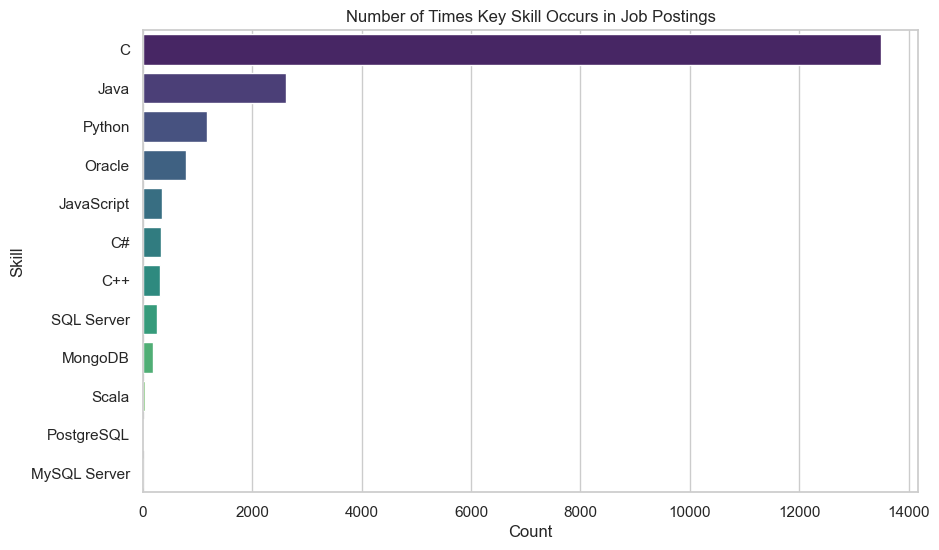

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

skill_counts = {'Java': 2609, 
                'Python': 1173, 
                'SQL Server': 250, 
                'MongoDB': 174, 
                'C++': 305, 
                'Oracle': 784, 
                'Scala': 33, 
                'C': 13498, 
                'MySQL Server': 0, 
                'JavaScript': 355, 
                'C#': 333, 
                'PostgreSQL': 10
                }
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(skill_counts.items()), 
                  columns=['Skill', 'Count']
                  )

# Sort the DataFrame by Count in descending order
df = df.sort_values(by='Count', ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', 
            y='Skill', 
            data=df, 
            palette='viridis')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Number of Times Key Skill Occurs in Job Postings')
plt.show()

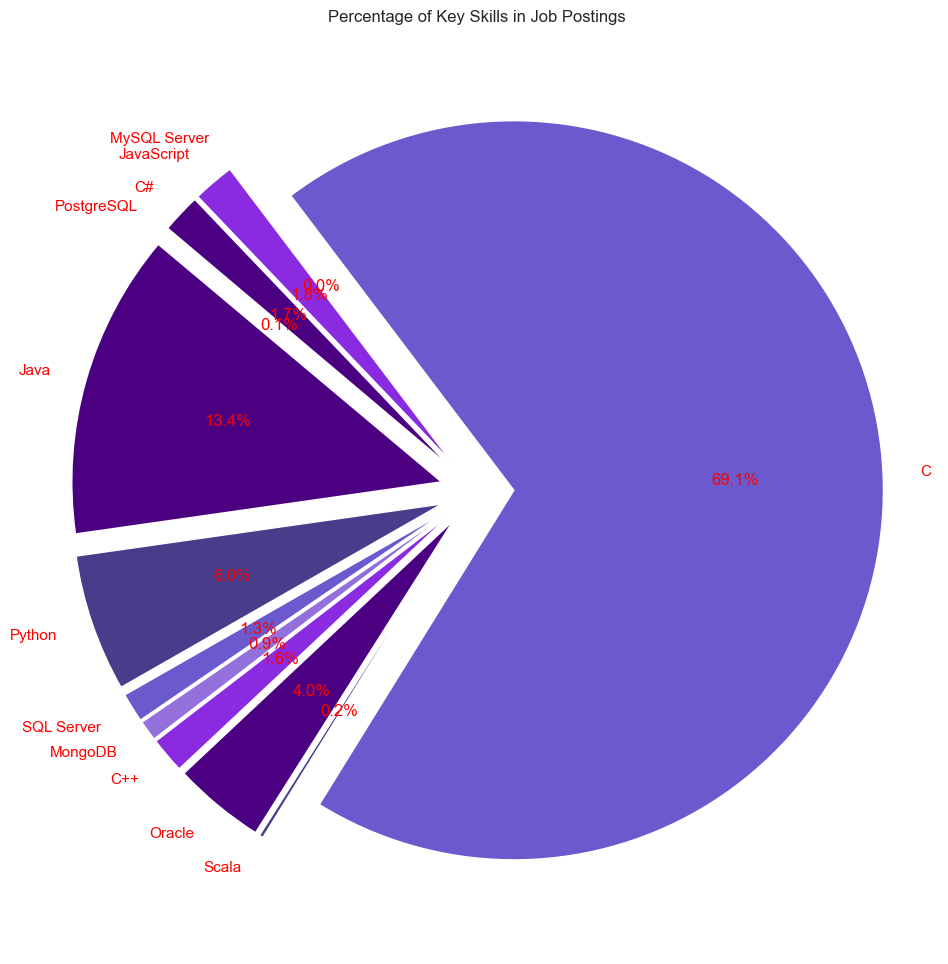

In [21]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Count'])

# Calculate the percentage of each skill
total_count = df['Count'].sum()
df['Percentage'] = (df['Count'] / total_count) * 100

# Set the Seaborn style and custom color palette
sns.set(style="whitegrid", palette=["#4B0082", "#483D8B", "#6A5ACD", "#9370DB", "#8A2BE2"])

# Create an explode list to explode all slices equally
explode = [0.1] * len(df)  # Explode all slices equally

# Create a pie chart using Seaborn with increased figure size, explode, and rotated labels
plt.figure(figsize=(12, 12))
plt.pie(df['Percentage'], labels=df['Skill'], autopct='%1.1f%%', colors=sns.color_palette(),
        explode=explode, startangle=140, textprops={'color': 'red'})  # Adjust startangle as needed
plt.title('Percentage of Key Skills in Job Postings')
plt.gca().set_facecolor('black')  # Set background color to black
plt.show()

In [23]:

def unique_job_titles():
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()
        unique_job_titles = set()
        # Iterate through the job listings and add each job title to the set
        for job in job_listings:
            job_title = job.get("Job Title")
            if job_title:
                unique_job_titles.add(job_title)
        return list(unique_job_titles)
    else:
        print("Failed to fetch data from the URL.")
        return []

def get_number_of_jobs_by_title(title_function):
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python list of dictionaries
        job_listings = response.json()
        title_counts = {}
        
        # Get the list of unique job titles using the provided title_function
        unique_job_titles = title_function

        # Iterate through the job listings and count occurrences of each job title
        for title in unique_job_titles:
            title_counts[title] = 0
            for job in job_listings:
                job_title = job.get("Job Title")
                if job_title and job_title.lower() == title.lower():
                    title_counts[title] += 1
        
        return title_counts
    else:
        print("Failed to fetch data from the URL.")
        return {}

# Usage example
unique_titles = unique_job_titles()
title_counts = get_number_of_jobs_by_title(unique_titles)
print(title_counts)

{'Sr Java Developer - Pl-sql/spring/hibernate': 1, 'Languages- Dean': 1, 'Head Corporate Travel': 1, 'Site Engineers': 3, 'Technical Sales-support Executive (inbound)': 1, 'Accountant / Asst. Accountant - Project Sites': 1, 'Dot net Full Stack Developer': 2, 'Resolution Manager': 1, 'Physical Training Instructor': 1, 'Executive Coordinator(HR Dept)': 1, 'Senior Automation Engineer': 2, 'Operation Specialist - Procurement for our Client, New Jersey': 1, 'On Roll Hiring Banking job for Freshers / Experienced': 1, 'INSIDE SALES MANAGER': 4, 'Indirect Regional Supplier Manager': 1, 'Senior Java Developer - Engineering Team': 1, 'Call AZRA huge Openings in International call Center sal upto 5lack': 1, 'Immediate Hiring For Inbound Technical Support': 1, 'Marketing Executive - CCTV / Security Systems -': 1, 'Fullstack lead Developer': 1, 'Hedge Fund Sales': 1, 'RESTAURANT CAPTAIN': 2, 'Framework Engineer': 1, 'Viral Content Marketing Specialist': 1, 'NX Application Engineer(customization/dev

In [40]:
# Convert all titles to lowercase in the "Title" column
df_title['Title'] = df_title['Title'].str.lower()

# Sort the DataFrame by counts in descending order
df_unique_job_titles = df_title.sort_values(by='Count', ascending=False)

# Display the top 10 job titles
df_unique_job_titles = df_unique_job_titles.drop_duplicates()
df_unique_job_titles

,Title,Count
7231,php developer,129
9627,business development executive,125
14904,sales executive,124
7452,business development manager,104
17221,java developer,92
...,...,...
7570,python scripting+linux opening,1
7569,beverage manager,1
7568,hiring is going on for inbound tech support in...,1
7567,asst mgr/ manager gift card,1


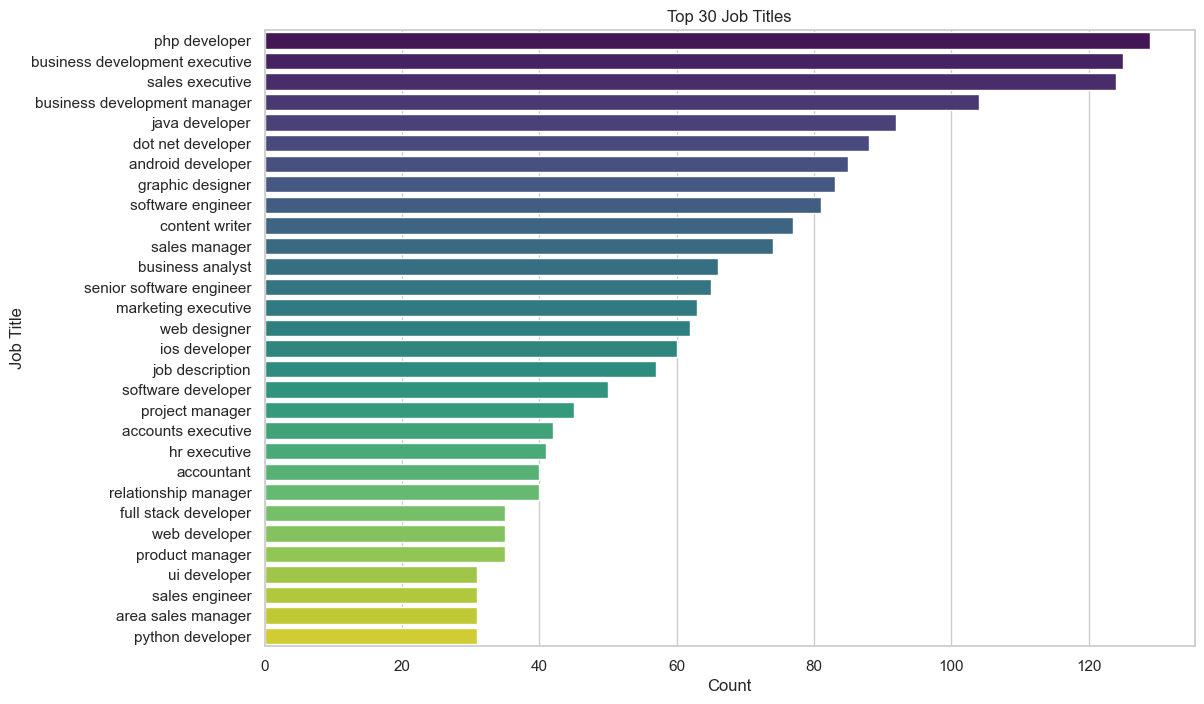

In [42]:

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Count", y="Title", data=df_unique_job_titles.head(30), palette="viridis")  # You can change the palette as needed


# Set labels and title
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.title("Top 30 Job Titles")

# Show the plot
plt.show()

## Author


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2022 IBM Corporation. All rights reserved. 
